##**1) Baixando as imagens de teste**

Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em >Runtime>Factory reset runtime

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git

Cloning into 'TestImages'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 104 (delta 22), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 19.32 MiB | 13.06 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
%cd /content/TestImages/Landsat/

/content/TestImages/Landsat


#**Trabalho 8: Pan-Sharpening**
Implemente o esquema de fusãão PAN (Pan-Sharpening) apresentado na figura a seguir. Inspire-se nos trechos de código apresentados ao longo destes exemplos para fazê-lo.



(765, 1628, 3)


(-0.5, 1627.5, 764.5, -0.5)

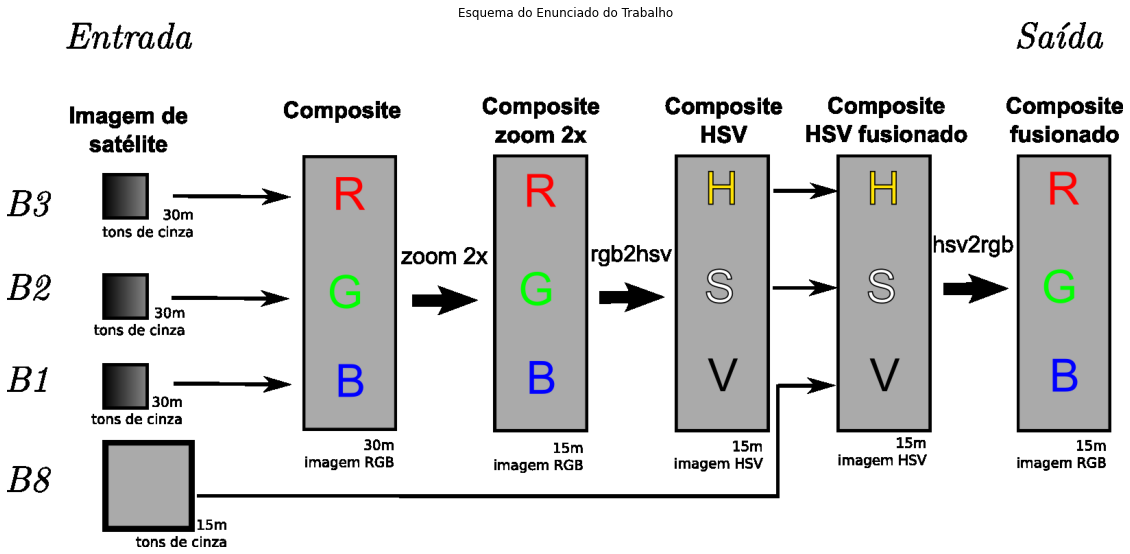

In [ ]:
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
img = cv2.imread('FusaoLandsat8.png', 1)
print(img.shape)
plt.figure(figsize = (20,15)) # figsize : (float width, float height)  in inches.
plt.title('Esquema do Enunciado do Trabalho')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
#plt.show()





# **Resolução do execício**

((0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'Composite Fusionado'))

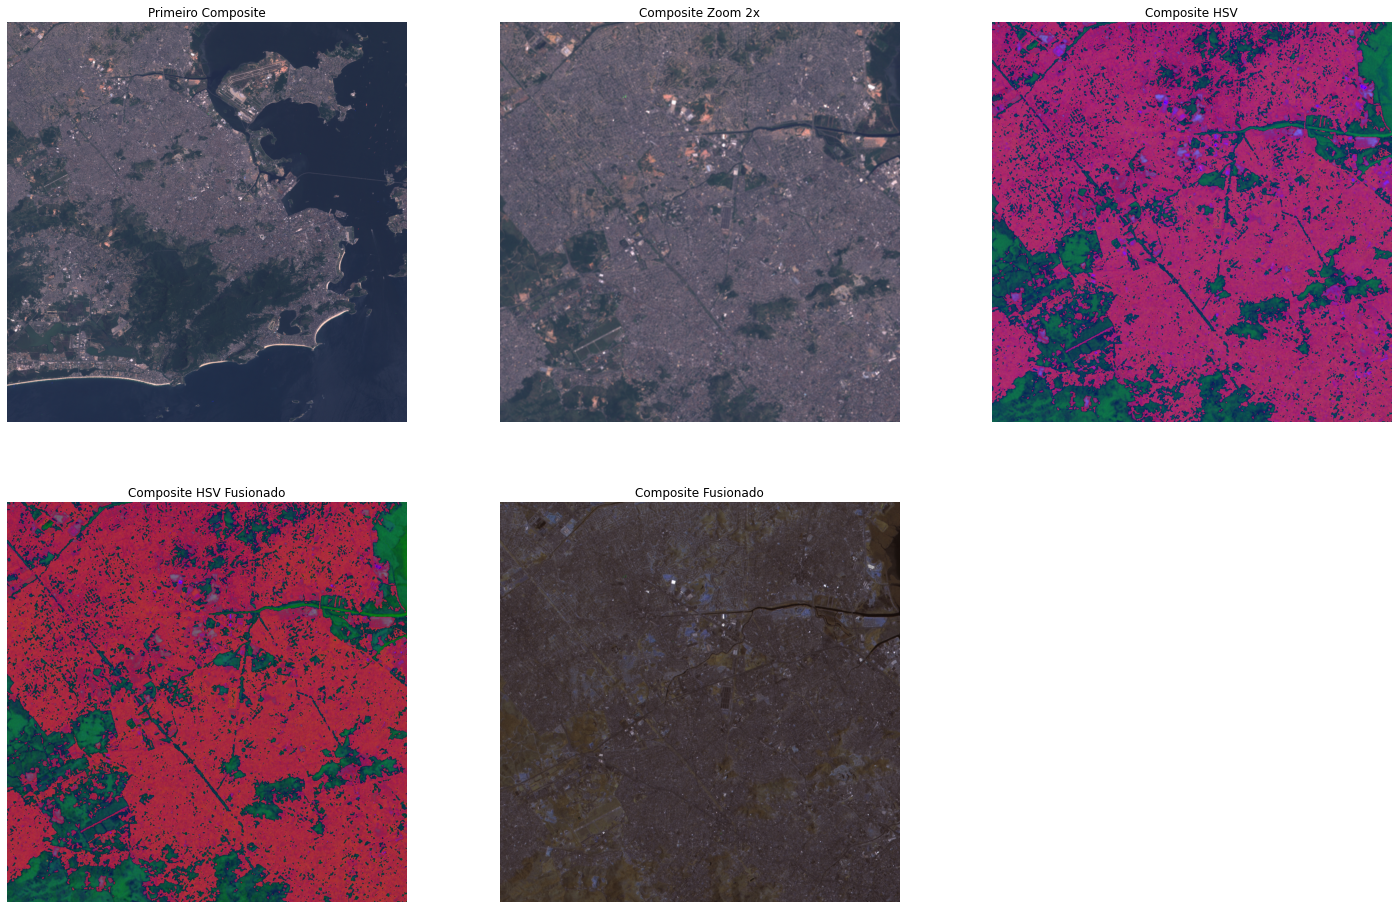

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# 1º Passo: carrega as imagens de satélite
band1 = cv2.imread('LANDSAT_7_ETMXS_20000111_217_076_L2_BAND1.tif', 0)
band2 = cv2.imread('LANDSAT_7_ETMXS_20000111_217_076_L2_BAND2.tif', 0)
band3 = cv2.imread('LANDSAT_7_ETMXS_20000111_217_076_L2_BAND3.tif', 0)


plt.figure(figsize = (25,25))
RGB=cv2.cvtColor(np.stack((band1,band2, band3), axis=2), cv2.COLOR_BGR2RGB) #composite, levando em consideração as disposição default de bandas como BGR do OpenCV
plt.subplot(3,3,1)
plt.title('Primeiro Composite')
plt.imshow(RGB)
plt.axis('off')

# 2º Passo: Fazer o Zoom X2
M = np.float32([[1, 0,0], [0,1,0], [0,0,1]])
RGBX = cv2.warpPerspective(RGB,M,(512,512),flags=cv2.INTER_NEAREST)
RGBX2 = cv2.resize(RGBX,(1024,1024),cv2.INTER_CUBIC)
plt.subplot(3,3,2)
plt.axis('off'), plt.imshow(RGBX2),plt.title('Composite Zoom 2x')

# 3º Passo: Gerar o Composite com disposição de bandas em HSV ao invés de RGB
HSV=cv2.cvtColor(RGBX2, cv2.COLOR_BGR2HSV)
plt.subplot(3,3,3)
plt.axis('off'), plt.imshow(HSV),plt.title('Composite HSV')

# 4º Passo: Aplicar Filtro PAN
B8 = cv2.imread('LANDSAT_7_ETMPAN_20000111_217_076_L2_BAND8.tif', 0)

B8_out = cv2.warpPerspective(B8,M,(1024,1024),flags=cv2.INTER_NEAREST)
#B8_out = B8_out[0:512,0:512]
#B8_out = cv2.resize(B8_out,(1024,1024))
H, S, V = cv2.split(HSV)
HSV2 = cv2.merge((H,S,B8_out))

plt.subplot(3,3,4)
plt.axis('off'), plt.imshow(HSV2),plt.title('Composite HSV Fusionado')

# 5º Passo: Trazer imagem de volta para RGB
img= cv2.cvtColor(HSV2, cv2.COLOR_HSV2RGB)
plt.subplot(3,3,5)
plt.axis('off'), plt.imshow(img),plt.title('Composite Fusionado')

# **Passo a Passo**

Pan-Sharpening é um processo de mesclagem de imagem onde usamos imagens pancromáticas de baixa resolução em conjunto uma imagem espectral de alta resolução, gerando assim uma imagem com realce em sua nitidez.

**1ºPasso:**

Primeiramente foram extraídas 4 bandas do satélite LANDSAT-8, as bandas 1, 2 e 3. Todas imagens monocromáticas. Logo em seguida essas imagens são mergidas de formando um composite RGB, ou seja, uma imagem colorida.

**2º Passo:**

A imagem colorida (RGB) então sofre um Zoom de 2x usando as funções *cv2.warpPerspective* e *cv2.resize* assumindo o valor da matriz de parâmetros de transformação como uma matriz 3x3 do tipo identidade.

**3ºPasso:**

Em seguida, essa imagem é convertida para o sistema de cores HSV, onde H é matiz (ou tonalidade), S é saturação (proximidade do valor da cor em relação à escala de cinza) e V é o brilho da imagem. Isso é feito porque porpue a imagem RGB perde informação ao fazer um upsampling para traze-la para dimensão original.

**4º Passo**

A banda 8 do LANDSAT-8 é extraída. Essa é uma imagem infra-vermelho, ou seja espectral, que age como o filtro PAN neste exercício. O filtro Pan pode ser visto como uma matriz de valores da imagem em alta resolução. A imagem é então redimensionanda de 2048x2048 para 1024x1024.

A imagem HSV tem suas bandas separadas, o que gera três imagens monogromáticas. Logo em seguida as imagens resultantes das bandas H e S são mergidas novamente, porém agora, com o filtro PAN como banda V. Gerando uma nova imagem HSV, só que desta vez com uma imagem de alta resolução.

**5º Passo**

Por fim, a imagem HSV já filtrada é convertida novamente para RGB, gerando uma imagem final com maior nitidez do que a original.

Esse processo todo é feito de forma a econominar espaço, pois ao trazer e trabalhar com somente uma imagem de alta resolução nós poupamos a máquina e ganhamos tempo no processo.



## **Este código apresenta como obter as bandas 1, 2, 3 e 8 da imagem de teste diretamente do github**

(-0.5, 2047.5, 2047.5, -0.5)

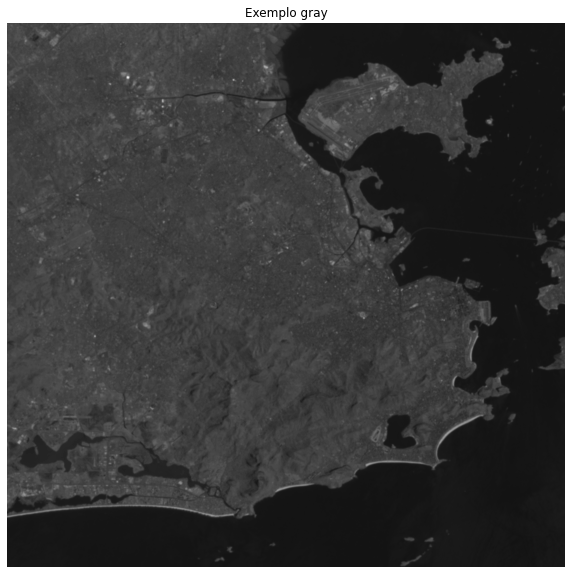

In [ ]:
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
img = cv2.imread('LANDSAT_7_ETMPAN_20000111_217_076_L2_BAND8.tif', 0)
plt.figure(figsize = (10,10)) # figsize : (float width, float height)  in inches.
plt.title('Exemplo gray')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic',aspect='auto')
plt.axis('off')
#plt.show()

##**2) O código a seguir demonstra como fazer a uma operaçãão geoméétrica. Modifique-o para fazer o zoom das bandas H e S**

/content/TestImages/StormTrooper
(765, 1628)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f7a2802e198>,
 (0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'Output'))

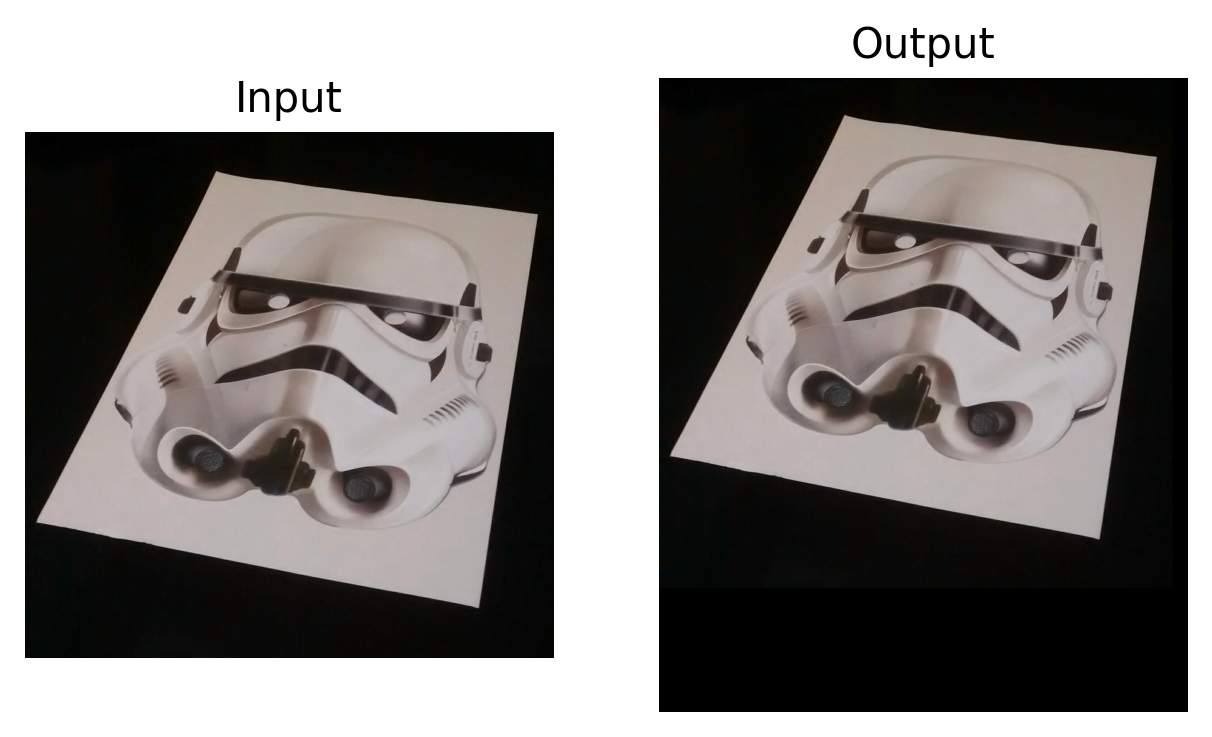

In [ ]:
%cd /content/TestImages/StormTrooper/
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_in = cv2.imread('StormTrooper.jpg')

print(img.shape)

M = np.float32([[1, 0,0], [0,1,0], [0,0,1]])

img_out = cv2.warpPerspective(img_in,M,(1500,1800),flags=cv2.INTER_NEAREST)

plt.figure(dpi=250)
plt.subplot (121), plt.axis('off'), plt.imshow(img_in),plt.title('Input')
plt.subplot (122), plt.axis('off'), plt.imshow(img_out),plt.title('Output')



##**3) Fusão de imagens tons de cinza em uma imagem colorida**

Agora eu vou mostrar como fundir **imgens** tons de cinza em uma úúnica imagem RGB

/content/TestImages/Landsat


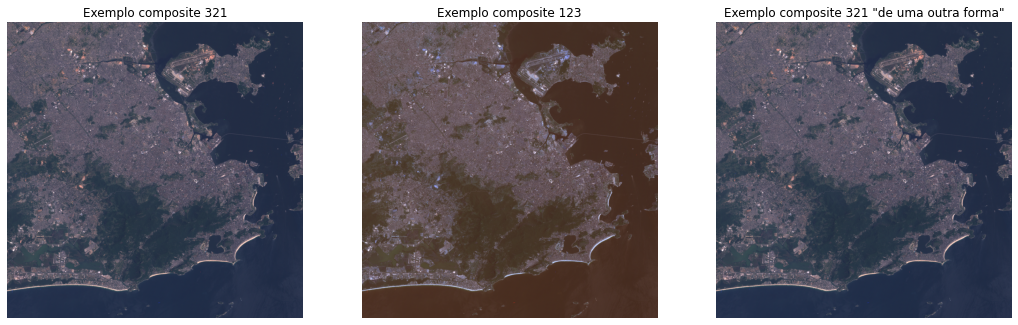

In [ ]:
%cd /content/TestImages/Landsat/
band1 = cv2.imread('LANDSAT_7_ETMXS_20000111_217_076_L2_BAND1.tif', 0)
band2 = cv2.imread('LANDSAT_7_ETMXS_20000111_217_076_L2_BAND2.tif', 0)
band3 = cv2.imread('LANDSAT_7_ETMXS_20000111_217_076_L2_BAND3.tif', 0)
plt.figure(figsize = (18,18)) # figsize : (float width, float height)  in inches.

plt.subplot(1,3,1)
plt.title('Exemplo composite 321')
plt.axis('off')
plt.imshow(cv2.cvtColor(np.stack((band1,band2, band3), axis=2), cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.title('Exemplo composite 123')
plt.axis('off')
plt.imshow(np.stack((band1,band2, band3), axis=2))

plt.subplot(1,3,3)
plt.title('Exemplo composite 321 "de uma outra forma"')
plt.axis('off')
plt.imshow(np.stack((band3,band2, band1), axis=2))

#plt.show()
